In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import sklearn.tree as tree

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

from tqdm import tqdm

seed = 42

# Read data

In [2]:
df = pd.read_csv('binary_baseline.dataset')
features = df.columns[:8]
print(df.shape)



(35942, 9)


In [3]:
x = df.values
scaler = preprocessing.MinMaxScaler()
scaled_x = scaler.fit_transform(x)
df = pd.DataFrame(data=scaled_x, columns=df.columns)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df['target'], shuffle=True, random_state=seed)
len(X_train), len(X_test)

(26956, 8986)

# Construct decision tree

In [5]:
accs = list()
for i in range(100):
    decision_tree = DecisionTreeClassifier(min_samples_split=20, max_depth=3, criterion='entropy', random_state=i)
    decision_tree.fit(X_train, Y_train)

    preds = decision_tree.predict(X_test)
    results = (preds == Y_test)
    results = [1 if x == True else 0 for x in results]
    accs.append(sum(results)/len(results) * 100)
print(f'Accuracy: {sum(accs)/len(accs)}')

Accuracy: 58.05697752058766


# Visualize Tree

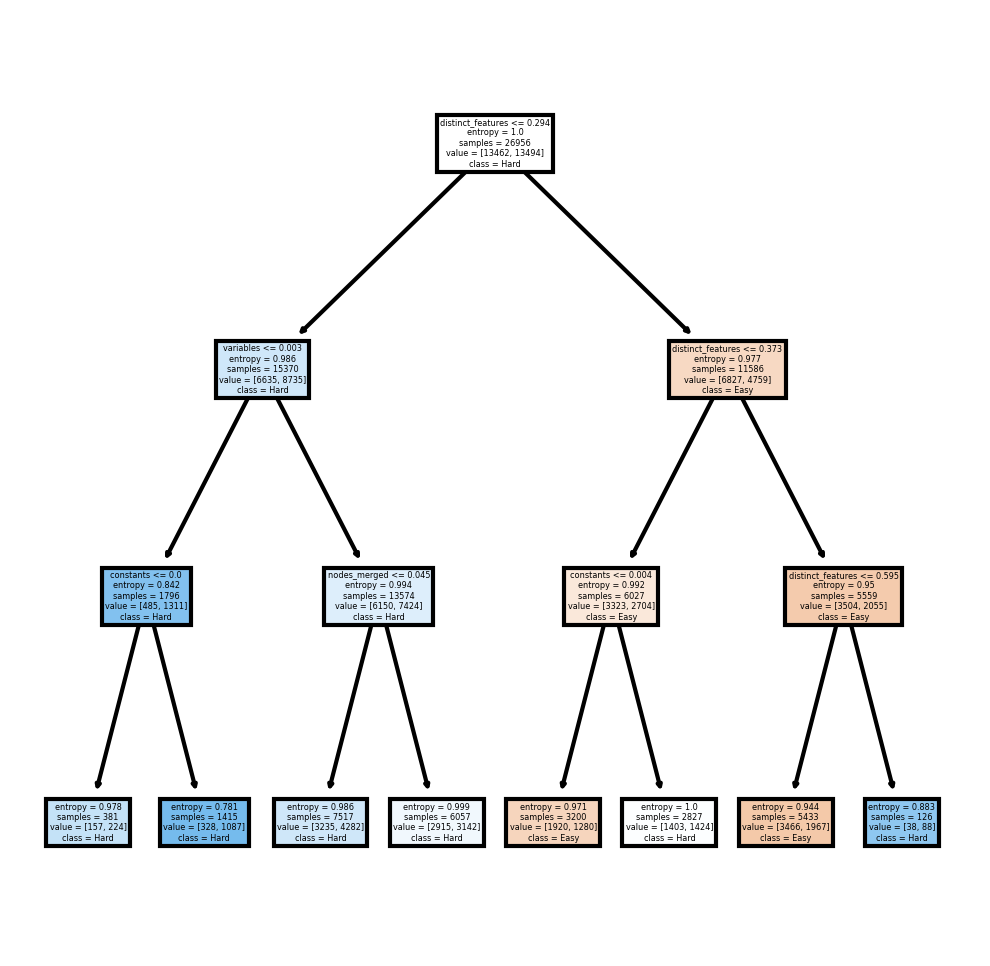

In [6]:
visualize_tree = True

if visualize_tree:
    cn = ['Easy','Hard']

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
    tree.plot_tree(decision_tree,
                   feature_names = features, 
                   class_names=cn,
                   filled = True);
    fig.savefig('imagename.png')

In [7]:
accs = list()
for i in tqdm(range(100)):
    random_forest = RandomForestClassifier(min_samples_split=20, max_depth=3, criterion='entropy', random_state=i)
    random_forest.fit(X_train, Y_train)

    preds = random_forest.predict(X_test)
    results = (preds == Y_test)
    results = [1 if x == True else 0 for x in results]
    accs.append(sum(results)/len(results) * 100)
print(f'Accuracy: {sum(accs)/len(accs)}')

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]

Accuracy: 58.41219675050079


In [8]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, Y_train)

preds = svm_classifier.predict(X_test)
results = (preds == Y_test)
results = [1 if x == True else 0 for x in results]
print(f'Accuracy: {sum(results)/len(results) * 100}')

Accuracy: 59.10304918762519


In [9]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

preds = gnb.predict(X_test)
results = (preds == Y_test)
results = [1 if x == True else 0 for x in results]
print(f'Accuracy: {sum(results)/len(results) * 100}')

Accuracy: 57.6118406409971


In [10]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

preds = mnb.predict(X_test)
results = (preds == Y_test)
results = [1 if x == True else 0 for x in results]
print(f'Accuracy: {sum(results)/len(results) * 100}')

Accuracy: 51.69152014244381
